In [3]:
import pandas as pd
import csv
csv.field_size_limit(1000000000)


df=pd.read_csv("/content/drive/My Drive/state-of-the-union - state-of-the-union.csv")

In [4]:
df.head

<bound method NDFrame.head of      1790 George Washington\nJanuary 8, 1790\n\nFellow-Citizens of the Senate and House of Representatives:\n\nI embrace with great satisfaction the opportunity which now presents itself\nof congratulating you on the present favorable prospects of our public\naffairs. The recent accession of the important state of North Carolina to\nthe Constitution of the United States (of which official information has\nbeen received), the rising credit and respectability of our country, the\ngeneral and increasing good will toward the government of the Union, and\nthe concord, peace, and plenty with which we are blessed are circumstances\nauspicious in an eminent degree to our national prosperity.\n\nIn resuming your consultations for the general good you can not but derive\nencouragement from the reflection that the measures of the last session\nhave been as satisfactory to your constituents as the novelty and\ndifficulty of the work allowed you to hope. Still further 

In [5]:
df.columns=['year_of_the_speech','text_of_the_speech']

In [6]:
df['year_of_the_speech']

0      1790
1      1791
2      1792
3      1793
4      1794
       ... 
220    2008
221    2009
222    2010
223    2011
224    2012
Name: year_of_the_speech, Length: 225, dtype: int64

In [7]:
df

,year_of_the_speech,text_of_the_speech
0,1790,\nState of the Union Address\nGeorge Washingto...
1,1791,\nState of the Union Address\nGeorge Washingto...
2,1792,\nState of the Union Address\nGeorge Washingto...
3,1793,\nState of the Union Address\nGeorge Washingto...
4,1794,\nState of the Union Address\nGeorge Washingto...
...,...,...
220,2008,\nState of the Union Address\nGeorge W. Bush\n...
221,2009,\nAddress to Joint Session of Congress \nBarac...
222,2010,\nState of the Union Address\nBarack Obama \nJ...
223,2011,\nState of the Union Address\nBarack Obama \nJ...


In [8]:
df['text_of_the_speech'].fillna("",inplace=True)
  
df['text_of_the_speech'][206]

''

In [9]:
minl=100000
maxl=0
for i in range(205,225):
  if(df['text_of_the_speech'][i]==''):     #leave empty speeches
    continue
  if(len(df['text_of_the_speech'][i])<minl):
    minl=len(df['text_of_the_speech'][i])
  if(len(df['text_of_the_speech'][i])>maxl):
    maxl=len(df['text_of_the_speech'][i])

print("min length of a speech ",minl)
print("max length of a speech",maxl)      

min length of a speech  17410
max length of a speech 44271


cleaning text

Stopwords -- nltk + custom


In [10]:
a_file = open("/content/drive/My Drive/extra_stopwords.txt", "r")
new_stopwords= []
for line in a_file:
  stripped_line = line.strip()
  #line_list = stripped_line. split()
  new_stopwords. append(stripped_line)
a_file. close()
print(new_stopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [11]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
print('because' in stopwords)
stopwords.extend(new_stopwords)
print(stopwords)
print('because' in stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
True
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both'

removing stopwords and keeping those tokens which occur  more than once in the corpus

In [12]:
import gensim
import re

from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
def lemmatize_stemming(text):
    return (WordNetLemmatizer().lemmatize(text, pos='v'))# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :      #tokenize
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [13]:
# Create a set of frequent words

stoplist = stopwords
text_corpus=df['text_of_the_speech']




# Lowercase each document, split it by white space and filter out stopwords
texts = [[re.sub(r"[0-9]+","",word) for word in  preprocess(document) if word not in stoplist]
         for document in text_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if (frequency[token] > 1 )] for text in texts]
while('' in processed_corpus) : 
    processed_corpus.remove('') 
print(processed_corpus[0])

['state', 'union', 'address', 'george', 'washington', 'december', 'fellow', 'citizens', 'senate', 'house', 'representatives', 'meet', 'feel', 'satisfaction', 'able', 'repeat', 'congratulations', 'favorable', 'prospect', 'continue', 'distinguish', 'public', 'affairs', 'abundant', 'fruit', 'year', 'bless', 'country', 'plenty', 'mean', 'flourish', 'commerce', 'progress', 'public', 'credit', 'witness', 'considerable', 'rise', 'american', 'stock', 'abroad', 'home', 'revenues', 'allot', 'national', 'purpose', 'productive', 'calculations', 'regulate', 'circumstance', 'please', 'proof', 'fertility', 'resources', 'assure', 'increase', 'national', 'respectability', 'credit', 'bear', 'honorable', 'testimony', 'patriotism', 'integrity', 'mercantile', 'marine', 'citizens', 'punctuality', 'discharge', 'engagements', 'exemplary', 'conformity', 'power', 'vest', 'act', 'session', 'loan', 'florins', 'provisional', 'measure', 'previously', 'take', 'place', 'complete', 'holland', 'celerity', 'fill', 'natu

Creating a dictionary , where every unique word in the corpus will have an id(useful for creating bow representation)

In [14]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(8796 unique tokens: ['able', 'abridge', 'abroad', 'abundant', 'abundantly']...)


In [15]:
 dictionary.filter_extremes(no_below= 10, no_above=0.6)
 print(dictionary)

Dictionary(3325 unique tokens: ['able', 'abroad', 'abundant', 'abundantly', 'accordingly']...)


In [16]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
print(bow_corpus[0])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 3), (39, 1), (40, 3), (41, 1), (42, 2), (43, 1), (44, 1), (45, 4), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 2), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 3), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 3), (104, 2), (105, 1), (106, 2), (107, 1), (108, 1), (109, 2), (110, 1),

Transforming to tf-idf vector space from bow space


In [17]:
from gensim import models

tfidf = models.TfidfModel(bow_corpus)

to apply a transformation to a whole corpus:

In [18]:
tfidf_corpus=tfidf[bow_corpus]
cnt=0
for vec in tfidf_corpus:
  print(vec)
  cnt+=1
  if(cnt>10):
    break

[(0, 0.01930501619108233), (1, 0.025005565018623627), (2, 0.10226324117367902), (3, 0.08039502766155154), (4, 0.05195127605876309), (5, 0.02411263109326555), (6, 0.08693743846586585), (7, 0.04006365993511476), (8, 0.031101149565307712), (9, 0.022966789867950452), (10, 0.02324866235039286), (11, 0.02324866235039286), (12, 0.020555795310587457), (13, 0.03266846637253021), (14, 0.0395361832723337), (15, 0.02856240080130172), (16, 0.08293377642555753), (17, 0.03266846637253021), (18, 0.044707858981038455), (19, 0.06074782513764634), (20, 0.03348812184445379), (21, 0.038013671691864225), (22, 0.02656371098704865), (23, 0.15615466325395796), (24, 0.040601793409809975), (25, 0.02213863919550067), (26, 0.01979830252971023), (27, 0.026244704766729153), (28, 0.024406962276133475), (29, 0.0731469985673624), (30, 0.014205312158220905), (31, 0.050011130037247255), (32, 0.06074782513764634), (33, 0.02592947385660295), (34, 0.018345031178049982), (35, 0.01979830252971023), (36, 0.056476825906173526),

Finding optimum number of topics using coherence scores

> Indented block



In [19]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [20]:
def plot_graph(doc_clean,start, stop, step):
    #dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    doc_term_matrix=tfidf_corpus
    doc_clean=processed_corpus
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [21]:
from gensim.models import LsiModel
import matplotlib.pyplot as plt

from gensim.models.coherencemodel import CoherenceModel
start,stop,step=10,30,1
plot_graph(processed_corpus,start,stop,step)

KeyboardInterrupt: ignored

lsi model


In [22]:
lsi_model = models.LsiModel(tfidf_corpus, id2word=dictionary, num_topics=25)  # initialize an LSI transformation
corpus_lsi = lsi_model[tfidf_corpus]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [23]:
cnt=0
print("format")
print("topic followed by its proportion in the document -- >  a vector having dimensions equal to number of topics")
print("text of the speech")
for vec,doc in zip(corpus_lsi,text_corpus):
  print(vec,doc)
  cnt+=1
  if(cnt>2):
    break

format
topic followed by its proportion in the document -- >  a vector having dimensions equal to number of topics
text of the speech
[(0, -0.28635451858971767), (1, -0.2844268164041747), (2, -0.0900071795831969), (3, 0.16470873850995457), (4, -0.036351716096405404), (5, -0.18024112033655382), (6, 0.023208641320320394), (7, 0.22939068017919784), (8, -0.02489700323608815), (9, -0.09423112131840992), (10, -0.05006448961329257), (11, -0.006486305064706762), (12, -0.044391078484755195), (13, 0.049089804823326186), (14, -0.025432094167803322), (15, 0.0262435411533835), (16, -0.0075279041884926965), (17, 0.2237087600065321), (18, 0.06003543000083272), (19, -0.12135560238902739), (20, 0.0011260770707723386), (21, -0.09632404599965472), (22, 0.07779165501703245), (23, 0.01863294079202998), (24, 0.00010402058896626494)] 
State of the Union Address
George Washington
December 8, 1790

Fellow-Citizens of the Senate and House of Representatives:

In meeting you again I feel much satisfaction in bei

In [24]:
print("LSI Model:")
 
for idx in range(25):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lsi_model.print_topic(idx, 10))
    print()

LSI Model:
Topic #0: -0.141*"world" + -0.135*"america" + -0.118*"program" + -0.110*"help" + -0.100*"tonight" + -0.098*"americans" + -0.089*"need" + -0.085*"years" + -0.084*"economic" + -0.080*"federal"

Topic #1: 0.157*"america" + 0.144*"tonight" + 0.133*"help" + 0.127*"americans" + 0.116*"program" + 0.108*"world" + -0.099*"subject" + -0.095*"commerce" + 0.093*"job" + 0.091*"budget"

Topic #2: -0.223*"tonight" + -0.175*"america" + -0.138*"iraq" + 0.137*"program" + 0.136*"economic" + -0.133*"americans" + -0.115*"terrorists" + 0.110*"world" + -0.108*"children" + 0.108*"farm"

Topic #3: 0.154*"militia" + 0.152*"enemy" + 0.108*"british" + -0.107*"mexico" + 0.094*"world" + 0.089*"defense" + -0.088*"cent" + -0.088*"tariff" + 0.086*"soviet" + -0.082*"award"

Topic #4: 0.262*"iraq" + 0.241*"terrorists" + -0.187*"program" + 0.174*"fight" + 0.163*"terror" + 0.151*"iraqi" + 0.143*"enemy" + 0.135*"enemies" + 0.127*"japanese" + 0.110*"afghanistan"

Topic #5: 0.161*"soviet" + 0.137*"treaty" + 0.111*

In [25]:
corpus_lsi[1][1][1]

-0.33221969375076316


To find document having max proportion of a given topic

In [26]:
max_doc=-100
max_prop=-100
t=22
for i in range(225):
  if(len(corpus_lsi[i])==0):
    continue
  if(corpus_lsi[i][t][1]>max_prop):
    max_prop=corpus_lsi[i][t][1]
    max_doc=df['year_of_the_speech'][i]
  
print(max_doc)

  



1809


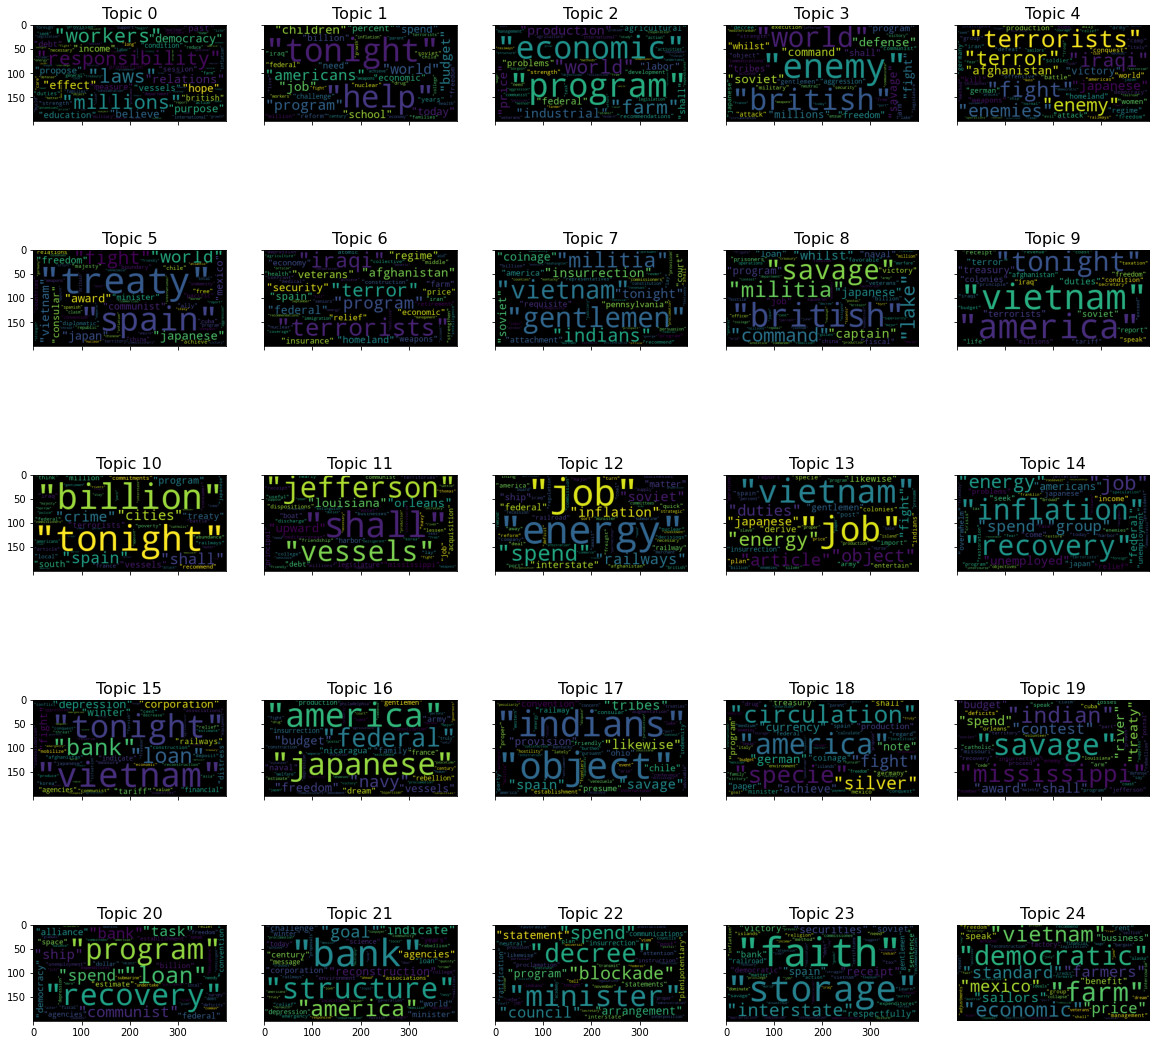

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

lsi_topics = lsi_model.print_topics(num_topics = 25, num_words = 100 )
f, axes_arr = plt.subplots(5, 5, sharex='col', sharey='row', figsize=(20,20))

for i in range(25):
    dicti = {}
    for temp in lsi_topics[i][1].split(" ")[1:]:
        if temp != '+':
            dicti[temp.split('*')[1]] = (float)(temp.split('*')[0])
    wordcloud = WordCloud( max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
    wordcloud.generate_from_frequencies(dicti)# Visualize the word cloud
    axes_arr[i//5][i%5].imshow(wordcloud)
    axes_arr[i//5][i%5].set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.axis('off')

lsi is not giving any interpretable topic .... moving to lda


In [30]:
lda_model = models.LdaModel(tfidf_corpus, id2word=dictionary, num_topics=25,minimum_probability=0)

In [31]:
corpus_lda = lda_model[tfidf_corpus]

In [32]:
print("LDA Model:")
 
for idx in range(25):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 15))
    print()

LDA Model:
Topic #0: 0.002*"world" + 0.002*"shall" + 0.001*"present" + 0.001*"america" + 0.001*"provision" + 0.001*"treasury" + 0.001*"commerce" + 0.001*"regard" + 0.001*"object" + 0.001*"paper" + 0.001*"currency" + 0.001*"economic" + 0.001*"executive" + 0.001*"militia" + 0.001*"need"

Topic #1: 0.002*"america" + 0.002*"tonight" + 0.002*"spend" + 0.001*"budget" + 0.001*"freedom" + 0.001*"americans" + 0.001*"democratic" + 0.001*"world" + 0.001*"family" + 0.001*"federal" + 0.001*"millions" + 0.001*"vessels" + 0.001*"agreement" + 0.001*"years" + 0.001*"arm"

Topic #2: 0.002*"job" + 0.002*"tonight" + 0.002*"americans" + 0.002*"america" + 0.002*"years" + 0.002*"world" + 0.001*"energy" + 0.001*"indians" + 0.001*"program" + 0.001*"president" + 0.001*"militia" + 0.001*"vietnam" + 0.001*"pennsylvania" + 0.001*"insurrection" + 0.001*"help"

Topic #3: 0.002*"america" + 0.002*"budget" + 0.002*"help" + 0.002*"medicare" + 0.002*"americans" + 0.002*"drug" + 0.002*"federal" + 0.002*"iraq" + 0.002*"pro

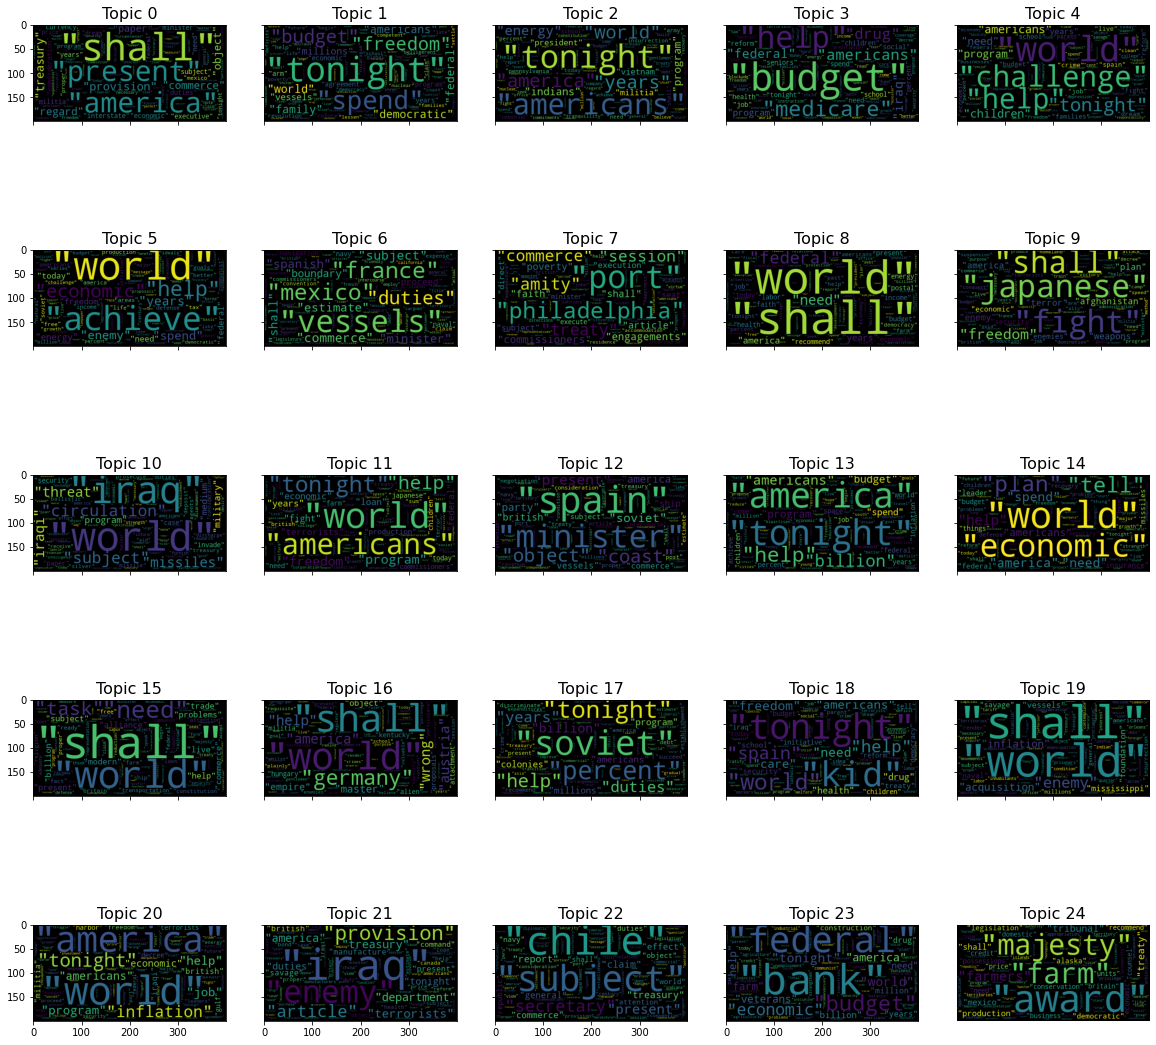

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

lda_topics = lda_model.print_topics(num_topics = 25, num_words = 100 )
f, axes_arr = plt.subplots(5, 5, sharex='col', sharey='row', figsize=(20,20))

for i in range(25):
    dicti = {}
    for temp in lda_topics[i][1].split(" ")[1:]:
        if temp != '+':
            dicti[temp.split('*')[1]] = (float)(temp.split('*')[0])
    wordcloud = WordCloud( max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
    wordcloud.generate_from_frequencies(dicti)# Visualize the word cloud
    axes_arr[i//5][i%5].imshow(wordcloud)
    axes_arr[i//5][i%5].set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.axis('off')

In [36]:
max_doc=-100
max_prop=-100
t=10



for i in range(225):
  if(len(corpus_lda[i])==0):
    continue
  if(corpus_lda[i][t][1]>max_prop):
    max_prop=corpus_lda[i][t][1]
    max_doc=df['year_of_the_speech'][i]
  
print(max_doc)

1825


In [37]:
print(df['text_of_the_speech'][224])


State of the Union Address
Barack Obama 
January 24, 2012

Mr. Speaker, Mr. Vice President, members of Congress, distinguished guests,
and fellow Americans:

Last month, I went to Andrews Air Force Base and welcomed home some of our
last troops to serve in Iraq. Together, we offered a final, proud salute to
the colors under which more than a million of our fellow citizens fought - and
several thousand gave their lives.

We gather tonight knowing that this generation of heroes has made the United
States safer and more respected around the world. For the first time in nine
years, there are no Americans fighting in Iraq. For the first time in two
decades, Osama bin Laden is not a threat to this country. Most of al-Qaeda's
top lieutenants have been defeated. The Taliban's momentum has been broken,
and some troops in Afghanistan have begun to come home.

These achievements are a testament to the courage, selflessness, and teamwork
of America's Armed Forces. At a time when too many of our i

Decade summarization algorithm

In [38]:
df

,year_of_the_speech,text_of_the_speech
0,1790,\nState of the Union Address\nGeorge Washingto...
1,1791,\nState of the Union Address\nGeorge Washingto...
2,1792,\nState of the Union Address\nGeorge Washingto...
3,1793,\nState of the Union Address\nGeorge Washingto...
4,1794,\nState of the Union Address\nGeorge Washingto...
...,...,...
220,2008,\nState of the Union Address\nGeorge W. Bush\n...
221,2009,\nAddress to Joint Session of Congress \nBarac...
222,2010,\nState of the Union Address\nBarack Obama \nJ...
223,2011,\nState of the Union Address\nBarack Obama \nJ...


In [39]:
df['text_of_the_speech'][123]

'\nState of the Union Address\nWoodrow Wilson\nDecember 2, 1913\n\nGentlemen of the Congress:\n\nIn pursuance of my constitutional duty to "give to the Congress information\nof the state of the Union," I take the liberty of addressing you on several\nmatters which ought, as it seems to me, particularly to engage the\nattention of your honorable bodies, as of all who study the welfare and\nprogress of the Nation.\n\nI shall ask your indulgence if I venture to depart in some degree from the\nusual custom of setting before you in formal review the many matters which\nhave engaged the attention and called for the action of the several\ndepartments of the Government or which look to them for early treatment in\nthe future, because the list is long, very long, and would suffer in the\nabbreviation to which I should have to subject it. I shall submit to you\nthe reports of the heads of the several departments, in which these\nsubjects are set forth in careful detail, and beg that they may rec

Approach-1
grouping speeches by decade after topic modelling then finding out of proportions of topic in each decade summary.

In [40]:
decade_dict={}

decades=['1901-1910','1911-1920','1921-1930','1931-1940','1941-1950','1951-1960','1961-1970','1971-1980','1981-1990','1991-2000','2001-2010','2011-2020']
start=111
for cnt in range(12):
  
  end=start+10
  #print(start,end)
  if(start==221):
    end=225
  decade_data=" "
  for i in range(start,end):
    #print(type(df['text_of_the_speech'][i]))
    decade_data=decade_data+df['text_of_the_speech'][i]
  
  start=end

  print(decades[cnt])
  decade_dict[decades[cnt]]=decade_data

1901-1910
1911-1920
1921-1930
1931-1940
1941-1950
1951-1960
1961-1970
1971-1980
1981-1990
1991-2000
2001-2010
2011-2020


preparing text to apply lda on this already trained on this corpus

In [41]:
print(decade_dict.keys())


dict_keys(['1901-1910', '1911-1920', '1921-1930', '1931-1940', '1941-1950', '1951-1960', '1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2020'])


In [42]:
# Create a set of frequent words

stoplist = stopwords
#text_corpus=df['text_of_the_speech']




# Lowercase each document, split it by white space and filter out stopwords
texts = [[re.sub(r"[0-9]+","",word) for word in  preprocess(document) if word not in stoplist]
         for document in decade_dict.values()]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus_decade = [[token for token in text if (frequency[token] > 1 )] for text in texts]
while('' in processed_corpus_decade) : 
    processed_corpus_decade.remove('') 
print(processed_corpus_decade[0])

from gensim import corpora
from gensim import models

dictionary_decade = corpora.Dictionary(processed_corpus_decade)
print(dictionary_decade)

dictionary_decade.filter_extremes(no_below= 3, no_above=0.9)
print(dictionary_decade)


bow_corpus_decade = [dictionary_decade.doc2bow(text) for text in processed_corpus_decade]
print(bow_corpus_decade[0])
 


tfidf_decade = models.TfidfModel(bow_corpus_decade)

tfidf_corpus_decade=tfidf_decade[bow_corpus_decade]


['state', 'union', 'address', 'william', 'taft', 'december', 'senate', 'house', 'representatives', 'past', 'year', 'foreign', 'relations', 'unite', 'state', 'continue', 'basis', 'friendship', 'good', 'understand', 'arbitration', 'year', 'notable', 'witness', 'pacific', 'settlement', 'important', 'international', 'controversies', 'permanent', 'court', 'hague', 'arbitration', 'fisheries', 'dispute', 'unite', 'state', 'great', 'britain', 'source', 'nearly', 'continuous', 'diplomatic', 'correspondence', 'fisheries', 'convention', 'give', 'award', 'satisfactory', 'party', 'arbitration', 'particularly', 'eminently', 'result', 'secure', 'arbitration', 'hold', 'general', 'arbitration', 'treaty', 'april', 'unite', 'state', 'great', 'britain', 'dispose', 'controversy', 'settlement', 'resist', 'resource', 'diplomacy', 'nearly', 'ninety', 'years', 'cause', 'friction', 'countries', 'common', 'lie', 'maintain', 'friendly', 'cordial', 'relations', 'unite', 'state', 'represent', 'tribunal', 'complicat

need to train lda as different tfidf(diff dimension) needs to be converted,,??
Why the current tfidf vectors have different dimensions ..
because dictionay is of diff size..
Didn't removed less frequent or more frequent token  

In [43]:
lda_model_decade = models.LdaModel(tfidf_corpus_decade, id2word=dictionary_decade, num_topics=15,minimum_probability=0.0)
corpus_lda_decade=lda_model_decade[tfidf_corpus_decade]
print(corpus_lda_decade[2])

[(0, 0.0023241453), (1, 0.0023242342), (2, 0.0023241458), (3, 0.0023241485), (4, 0.002324162), (5, 0.002324145), (6, 0.0023241483), (7, 0.0023241478), (8, 0.002324149), (9, 0.0023241455), (10, 0.002324145), (11, 0.002324145), (12, 0.9674618), (13, 0.0023241632), (14, 0.002324147)]


In [44]:

lda_model_decade.print_topics(num_topics=15,num_words=25)

[(0,
  '0.000*"armaments" + 0.000*"securities" + 0.000*"speculation" + 0.000*"civilian" + 0.000*"communist" + 0.000*"recommend" + 0.000*"aggressor" + 0.000*"survivors" + 0.000*"intelligent" + 0.000*"expenditures" + 0.000*"disarmament" + 0.000*"objectives" + 0.000*"atomic" + 0.000*"definite" + 0.000*"relationships" + 0.000*"maintenance" + 0.000*"agricultural" + 0.000*"mobilization" + 0.000*"statutory" + 0.000*"missiles" + 0.000*"expression" + 0.000*"civilization" + 0.000*"soviet" + 0.000*"mere" + 0.000*"soviets"'),
 (1,
  '0.001*"arbitration" + 0.001*"nicaragua" + 0.001*"estimate" + 0.001*"tonight" + 0.001*"protocol" + 0.001*"fisheries" + 0.001*"prize" + 0.001*"commercial" + 0.001*"ordinary" + 0.001*"railway" + 0.001*"cordial" + 0.001*"original" + 0.001*"bureaus" + 0.001*"dominion" + 0.001*"offices" + 0.001*"mexican" + 0.001*"convention" + 0.001*"conventions" + 0.001*"factions" + 0.001*"china" + 0.001*"diplomatic" + 0.001*"canal" + 0.001*"friendly" + 0.001*"ratify" + 0.001*"delegation"'

In [45]:
for i in range(12):
  print(decades[i],corpus_lda_decade[i]) 
  print()
  print()

1901-1910 [(0, 0.0038881965), (1, 0.9455652), (2, 0.003888197), (3, 0.0038882), (4, 0.003888203), (5, 0.0038881965), (6, 0.003888198), (7, 0.003888199), (8, 0.003888202), (9, 0.003888197), (10, 0.0038881965), (11, 0.0038881965), (12, 0.0038882317), (13, 0.003888198), (14, 0.003888198)]


1911-1920 [(0, 0.0022860207), (1, 0.043812755), (2, 0.002286022), (3, 0.5871594), (4, 0.08383648), (5, 0.0022860202), (6, 0.0022860267), (7, 0.0022860244), (8, 0.002286029), (9, 0.0022860214), (10, 0.0022860202), (11, 0.0022860202), (12, 0.26004508), (13, 0.0022860363), (14, 0.002286024)]


1921-1930 [(0, 0.002324157), (1, 0.00232424), (2, 0.0023241574), (3, 0.00232416), (4, 0.0023241735), (5, 0.0023241567), (6, 0.0023241597), (7, 0.0023241595), (8, 0.0023241607), (9, 0.0023241572), (10, 0.0023241567), (11, 0.0023241567), (12, 0.96746165), (13, 0.0023241749), (14, 0.0023241586)]


1931-1940 [(0, 0.0020273384), (1, 0.035695918), (2, 0.2397067), (3, 0.0020273614), (4, 0.26569584), (5, 0.002027337), (6, 0

In [46]:
print("iran vs usa 2000-2010")
for i in range(12):
  print(decades[i],(corpus_lda_decade[i][14]))  

iran vs usa 2000-2010
1901-1910 (14, 0.0038881989)
1911-1920 (14, 0.002286024)
1921-1930 (14, 0.0023241562)
1931-1940 (14, 0.002027344)
1941-1950 (14, 0.0021808357)
1951-1960 (14, 0.0018862854)
1961-1970 (14, 0.0022712841)
1971-1980 (14, 0.0022579047)
1981-1990 (14, 0.0024575673)
1991-2000 (14, 0.0026210672)
2001-2010 (14, 0.0034361137)
2011-2020 (14, 0.0030372383)


In [47]:
print("world war 2")
for i in range(12):
  print(decades[i],(corpus_lda_decade[i][2]))  

world war 2
1901-1910 (2, 0.003888198)
1911-1920 (2, 0.0022860225)
1921-1930 (2, 0.002324153)
1931-1940 (2, 0.2397339)
1941-1950 (2, 0.0021808357)
1951-1960 (2, 0.0018862851)
1961-1970 (2, 0.0022712823)
1971-1980 (2, 0.0022579045)
1981-1990 (2, 0.0024575638)
1991-2000 (2, 0.002621066)
2001-2010 (2, 0.0034361123)
2011-2020 (2, 0.003037239)


In [48]:
for i in range(12):
  print(decades[i],(corpus_lda_decade[i][14]))  

1901-1910 (14, 0.003888197)
1911-1920 (14, 0.0022860242)
1921-1930 (14, 0.0023241618)
1931-1940 (14, 0.002027344)
1941-1950 (14, 0.0021808348)
1951-1960 (14, 0.0018862856)
1961-1970 (14, 0.0022712834)
1971-1980 (14, 0.0022579045)
1981-1990 (14, 0.002457567)
1991-2000 (14, 0.0026210707)
2001-2010 (14, 0.0034361123)
2011-2020 (14, 0.0030372376)


LDA ON ap wire stories



In [50]:
years = []
corpus = []

prop_file = open('/content/ap.csv', 'r')
csv_reader = csv.reader(prop_file)
counter = 0
for row in csv_reader:
    try:
        if(len(row[1]) != 0):
          
            years.append(row[0])
            corpus.append(row[1])
    except Exception as e:
            print(e)
print()

In [51]:
print(len(years))
print(len(corpus))

2248
2248


In [52]:
# Create a set of frequent words

stoplist = stopwords
#text_corpus=df['text_of_the_speech']




# Lowercase each document, split it by white space and filter out stopwords
texts = [[re.sub(r"[0-9]+","",word) for word in  preprocess(document) if word not in stoplist]
         for document in corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus_ap = [[token for token in text if (frequency[token] > 1 )] for text in texts]
while('' in processed_corpus_ap) : 
    processed_corpus_ap.remove('') 
print(processed_corpus_ap[0])

from gensim import corpora
from gensim import models

dictionary_ap = corpora.Dictionary(processed_corpus_ap)
print(dictionary_ap)

dictionary_ap.filter_extremes(no_below= 3, no_above=0.6)
print(dictionary_ap)


bow_corpus_ap = [dictionary_ap.doc2bow(text) for text in processed_corpus_ap]
print(bow_corpus_ap[0])
 


tfidf_ap = models.TfidfModel(bow_corpus_ap)

tfidf_corpus_ap=tfidf_ap[bow_corpus_ap]

['year', 'student', 'private', 'baptist', 'school', 'allegedly', 'kill', 'teacher', 'wound', 'fire', 'fill', 'classroom', 'apparently', 'snap', 'school', 'pastor', 'say', 'know', 'happen', 'say', 'george', 'sweet', 'pastor', 'atlantic', 'shore', 'baptist', 'church', 'good', 'christian', 'school', 'pride', 'discipline', 'kid', 'good', 'kid', 'atlantic', 'shore', 'christian', 'school', 'sophomore', 'arrest', 'charge', 'degree', 'murder', 'attempt', 'murder', 'malicious', 'assault', 'relate', 'felony', 'charge', 'friday', 'morning', 'shoot', 'police', 'release', 'juvenile', 'neighbor', 'relatives', 'identify', 'nicholas', 'elliott', 'police', 'say', 'student', 'tackle', 'teacher', 'students', 'semiautomatic', 'pistol', 'jam', 'fire', 'classroom', 'students', 'cower', 'floor', 'cry', 'jesus', 'save', 'save', 'friends', 'family', 'say', 'apparently', 'trouble', 'grandmother', 'death', 'divorce', 'parent', 'torment', 'classmates', 'nicholas', 'grandfather', 'clarence', 'elliott', 'say', 'sat

In [53]:
lda_model_ap = models.LdaModel(tfidf_corpus_ap, id2word=dictionary_ap, num_topics=100,minimum_probability=0.0)
corpus_lda_ap=lda_model_ap[tfidf_corpus_ap]
print(len(corpus_lda_ap[2]))

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


100


In [54]:
lda_model_ap.print_topics(num_topics=20,num_words=10)

[(55,
  '0.012*"japan" + 0.012*"wilson" + 0.011*"beef" + 0.010*"vegas" + 0.009*"hamilton" + 0.008*"north" + 0.008*"vernon" + 0.008*"japanese" + 0.007*"holiday" + 0.006*"jury"'),
 (22,
  '0.019*"vietnam" + 0.018*"literary" + 0.014*"texaco" + 0.013*"china" + 0.011*"allan" + 0.011*"barber" + 0.011*"tally" + 0.009*"attract" + 0.009*"editor" + 0.009*"story"'),
 (8,
  '0.017*"iran" + 0.016*"iraqi" + 0.012*"iraq" + 0.009*"cease" + 0.008*"general" + 0.008*"geneva" + 0.007*"departure" + 0.005*"chaos" + 0.005*"reunion" + 0.005*"newsletter"'),
 (84,
  '0.015*"bushel" + 0.014*"cent" + 0.014*"corn" + 0.014*"higher" + 0.012*"lower" + 0.010*"article" + 0.010*"soybean" + 0.009*"percent" + 0.009*"straight" + 0.008*"governors"'),
 (48,
  '0.022*"silicon" + 0.017*"normal" + 0.015*"indictment" + 0.012*"average" + 0.007*"normalize" + 0.007*"agreements" + 0.007*"brazilian" + 0.006*"longstanding" + 0.006*"feedback" + 0.006*"farmer"'),
 (66,
  '0.012*"dinner" + 0.011*"charities" + 0.010*"theaters" + 0.009*"el

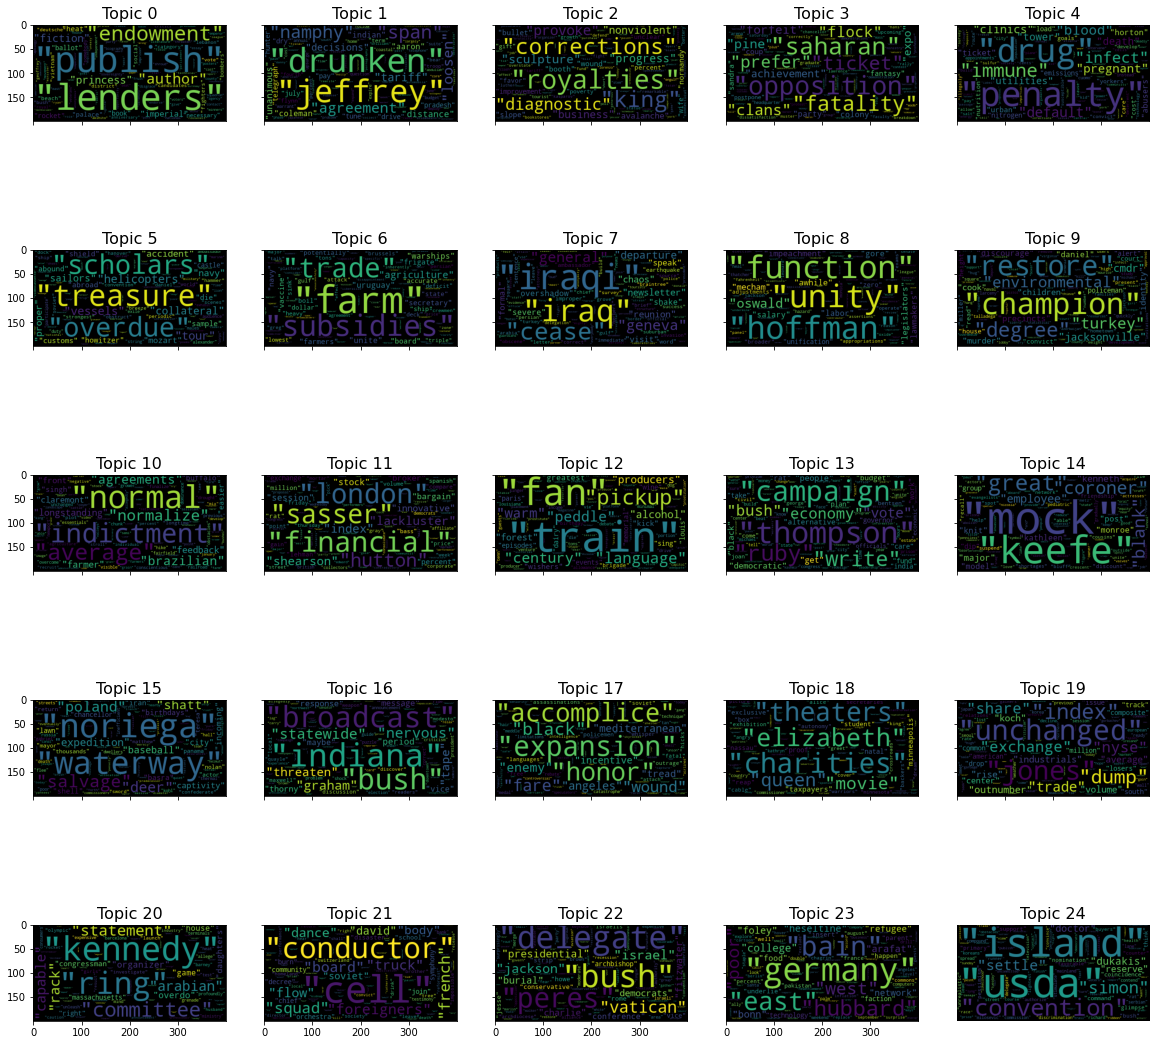

In [56]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

lda_topics_ap = lda_model_ap.print_topics(num_topics = 25, num_words = 100 )
f, axes_arr = plt.subplots(5, 5, sharex='col', sharey='row', figsize=(20,20))

for i in range(25):
    dicti = {}
    for temp in lda_topics_ap[i][1].split(" ")[1:]:
        if temp != '+':
            dicti[temp.split('*')[1]] = (float)(temp.split('*')[0])
    wordcloud = WordCloud( max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
    wordcloud.generate_from_frequencies(dicti)# Visualize the word cloud
    axes_arr[i//5][i%5].imshow(wordcloud)
    axes_arr[i//5][i%5].set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.axis('off')